# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [236]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [237]:
def find_sum(a: int, d: int, N: int) -> float:
    result = 0;
    for i in range(N):
        result += 1 / (a + i * d)
    return result

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [238]:
from math import log10, ceil

def get_digit_at(N, pos):
  return (N // pow(10, pos)) % 10

def check_palindrome(N):
    num_length = ceil(log10(N))
    l = 0
    r = num_length - 1
    while (l < r):
        if (get_digit_at(N, l) != get_digit_at(N, r)):
            return False
        l += 1
        r -= 1
    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [239]:
def find_palindromes(N):
    palindromes = []
    num = 42
    while (len(palindromes) != N):
        if (check_palindrome(num)):
          palindromes.append(num)
        num += 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 100, 101, 111, 121, 131, 141, 151]
[44, 55, 66, 77, 88, 99, 100, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [240]:
from random import randint

def find_median(a, b, c):
    if (c < b):
      return find_median(a, c, b)
    if (c < a):
      return find_median(b, c, a)
    if (b < a):
      return find_median(b, a, c)

    return b

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c), '\tAnswer:', sorted([a, b, c])[1])

-43 -15 8 	Median: -15 	Answer: -15
-24 -52 -40 	Median: -40 	Answer: -40
99 -28 15 	Median: 15 	Answer: 15
22 -72 -38 	Median: -38 	Answer: -38
13 82 -66 	Median: 13 	Answer: 13
-85 -54 -54 	Median: -54 	Answer: -54
86 77 -35 	Median: 77 	Answer: 77
17 36 -4 	Median: 17 	Answer: 17
-15 -19 43 	Median: -15 	Answer: -15
84 -69 92 	Median: 84 	Answer: 84


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

Воспользуемся фактом, что $\forall X, Y: X, Y \sim N$ верно $aX + bY + c \sim N$

In [241]:
my_array = np.random.normal(size=12)
my_array = my_array / my_array.sum() * 15
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 14.999999999999947


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [242]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def calculate_chebyshev(a, b):
    return np.abs(a - b).max()

def calculate_cosine(a, b):
    return 1 - a.T @ b / np.sqrt(np.sum(a ** 2) * np.sum(b ** 2))

In [243]:
a = np.random.rand(5)
b = np.random.rand(5)
print(a, b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

[0.89440797 0.67997031 0.43808661 0.35079623 0.29333062] [0.30019441 0.86533699 0.85904548 0.76371058 0.83566025]
Manhattan distance: 2.1557830973178165
Euclidean distance: 1.0145327160325204
Chebyshev distance: 0.5942135675350844
Cosine distance: 0.1991466542597673


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [244]:
def transform(array):
    lower_bound = -6
    upper_bound = 10
    transformed_array = (array - array.min())/(array.max() - array.min())
    transformed_array = transformed_array * (upper_bound - lower_bound) + lower_bound
    return transformed_array

In [245]:
my_array = np.random.randint(-100, 100, size=(42,))
print(my_array)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

[  83    0  -65   17   88   35    6   -7   53  -22   73    1   -8  -26
  -63   -5   82  -43   -7   74 -100  -20   -5   70    6   -3   93   74
  -85   23  -21   32  -85  -97   51  -57    7  -69    8    2   78   25]
Min: -6.0
Max: 10.0
Array:
[ 9.17098446  2.29015544 -3.0984456   3.69948187  9.58549223  5.19170984
  2.78756477  1.70984456  6.68393782  0.46632124  8.34196891  2.37305699
  1.62694301  0.13471503 -2.93264249  1.87564767  9.0880829  -1.2746114
  1.70984456  8.42487047 -6.          0.63212435  1.87564767  8.09326425
  2.78756477  2.04145078 10.          8.42487047 -4.75647668  4.19689119
  0.5492228   4.94300518 -4.75647668 -5.75129534  6.51813472 -2.43523316
  2.87046632 -3.43005181  2.95336788  2.45595855  8.75647668  4.3626943 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [246]:
my_array = np.random.randint(-12, 4, size=(10, 3))
column_index = np.argwhere(my_array == my_array.min())[0, 1]
selected_column = my_array[:, column_index]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[  0 -10  -9]
 [ -9  -5   2]
 [ -1   1  -1]
 [ -4  -3  -9]
 [  3  -1 -11]
 [ -9  -5  -4]
 [  3 -10  -7]
 [ -8  -4  -8]
 [ -1 -10   3]
 [ -2  -6  -2]]
Selected column: [ -9   2  -1  -9 -11  -4  -7  -8   3  -2]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [247]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.73552145 0.83676567 0.04776813 0.32272372        nan
 0.1000371  0.16921992        nan 0.25735415]


In [248]:
def replace_missing(arr):
    return np.nan_to_num(arr, nan=np.nanquantile(arr, 0.5))

In [249]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.25735415 0.73552145 0.83676567 0.04776813 0.32272372 0.25735415
 0.1000371  0.16921992 0.25735415 0.25735415]


**Answer:** согласно документации `np.random.rand` выдает значения из равномерного распределения, поэтому в таком случае заполнить наны можно квантилем 0.5 (медианой)

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [250]:
def stats_channel(X):
    # median = [np.median(X[:, :, 0]), np.median(X[:, :, 1]), np.median(X[:, :, 2])]
    # std = [np.std(X[:, :, 0]), np.std(X[:, :, 1]), np.std(X[:, :, 2])]
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [251]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -3., -3.]), array([5.37197137, 5.52252761, 5.31204931]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [252]:
def get_unique_values(X):
    unique_values = np.unique(X, axis=1)
    return unique_values

In [253]:
X = np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[5 4 4]
  [4 5 4]
  [4 4 5]]

 [[5 4 4]
  [5 4 4]
  [5 5 5]]

 [[4 5 4]
  [5 5 5]
  [5 5 5]]

 [[4 5 5]
  [4 5 5]
  [5 4 5]]

 [[5 4 5]
  [4 5 5]
  [5 5 5]]

 [[4 4 5]
  [5 4 5]
  [4 4 5]]

 [[5 4 5]
  [5 4 4]
  [4 5 5]]

 [[4 4 4]
  [4 5 4]
  [4 4 4]]

 [[5 5 4]
  [5 5 4]
  [4 4 4]]

 [[4 4 4]
  [4 4 4]
  [4 5 5]]

 [[5 5 4]
  [4 4 5]
  [5 5 4]]

 [[4 5 4]
  [4 4 4]
  [5 4 4]]

 [[5 5 5]
  [5 5 4]
  [5 5 5]]

 [[4 5 5]
  [4 4 5]
  [4 5 5]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 4 4]
  [4 4 4]
  [5 5 5]]

 [[5 4 5]
  [5 4 5]
  [5 5 5]]

 [[4 5 5]
  [5 5 5]
  [5 5 5]]

 [[4 4 5]
  [4 5 5]
  [5 5 4]]]
Unique :


array([[[4, 4, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [4, 5, 4]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 5, 5]],

       [[5, 5, 5],
        [4, 5, 5],
        [5, 4, 5]],

       [[4, 4, 5],
        [5, 4, 5],
        [4, 4, 5]],

       [[4, 5, 5],
        [5, 4, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 5, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [5, 5, 4],
        [5, 5, 4]],

       [[4, 5, 5],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 4],
        [4, 4, 5],
        [5, 5, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [4, 5, 4]],

       [[5, 5, 5],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [4, 4, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 4, 5],
        [5, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [254]:
dataset = pd.read_csv("titanic.csv")
dataset.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [255]:
dataset.columns[dataset.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

* Are there any missing values? In what columns?  
Ответ: да, пропущенные значения есть в колонках Age, Cabin, Embarked

In [256]:
dataset[dataset['Survived'] == 1].shape[0] / dataset['Survived'].shape[0]

0.3838383838383838

* What is the percentage of survived passengers? Are the classes balanced?  
Ответ: выжило примерно 38% человек. Классы несбаланисрованы, так как выжило на 12% меньше, чем не выжило


In [257]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Were there more males or females?  
Ответ: мужчин больше

In [258]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* What what the least popular port of embarkation?  
Ответ: меньше всего людей село в порту города Queenstown

In [259]:
dataset['Pclass'].unique()

array([3, 1, 2])

* How many passenger classes (pclass) were there on Tinanic?  
Ответ: 3 класса

In [260]:
dataset['Fare'].mean()

32.204207968574636

In [261]:
dataset.groupby('Pclass')['Fare'].mean().to_frame()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


What is the overall average ticket fare? And for every passenger class?  
Ответ: средняя стоимость билета составляет 32.204.
Средняя стоимость билета по каждому из классов расчитана в ячейке выше.

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

In [262]:
dataset['Age'].describe()[['min', 'max']]

min     0.42
max    80.00
Name: Age, dtype: float64

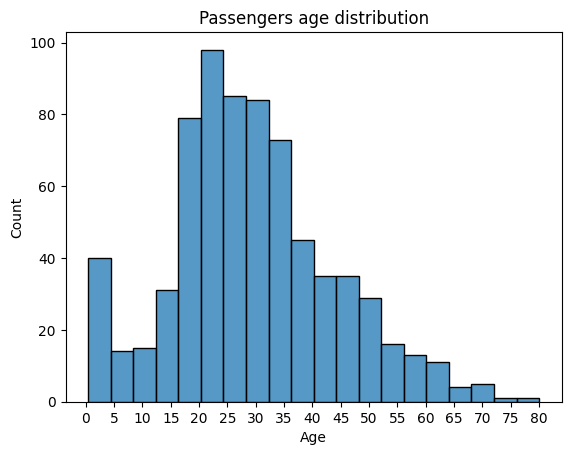

In [263]:
_ = sns.histplot(dataset['Age']).set(title='Passengers age distribution')
_ = plt.xticks(np.arange(0, 81, 5))

In [264]:
dataset['Age'].median()

28.0

In [265]:
dataset.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

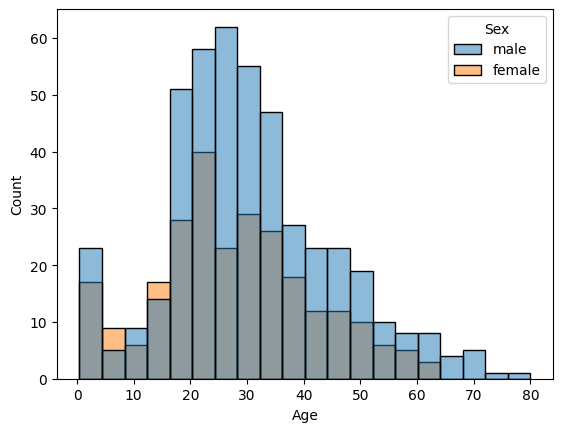

In [266]:
sns.histplot(dataset, x='Age', hue='Sex')

Выводы по графикам:
1. Пассажиры преимущественно находятся в возрасте от 16 до 40 лет.
2. На борту корабля было много детей возрастом до 5 лет.
3. Мужчин на корабле было больше.
4. Женщины отправлялись в путешествие в более молодом возрасте, чем мужчины. Такой вывод можно сделать из медиан по возрасту
5. В возрасте от 65 лет на корабле только мужчины

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [267]:
dataset['Title'] = dataset['Name'].str.extract("(\w*\.\s)")

In [268]:
dataset['Title'].unique().shape[0]

17

In [269]:
dataset['Title'].value_counts()

Mr.           517
Miss.         182
Mrs.          125
Master.        40
Dr.             7
Rev.            6
Mlle.           2
Major.          2
Col.            2
Countess.       1
Capt.           1
Ms.             1
Sir.            1
Lady.           1
Mme.            1
Don.            1
Jonkheer.       1
Name: Title, dtype: int64

In [270]:
dataset.groupby('Sex')['Title'].agg(pd.Series.mode)

Sex
female    Miss. 
male        Mr. 
Name: Title, dtype: object

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



In [271]:
dataset.groupby('Pclass')['Fare'].mean().to_frame()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


<Axes: xlabel='Pclass', ylabel='Fare'>

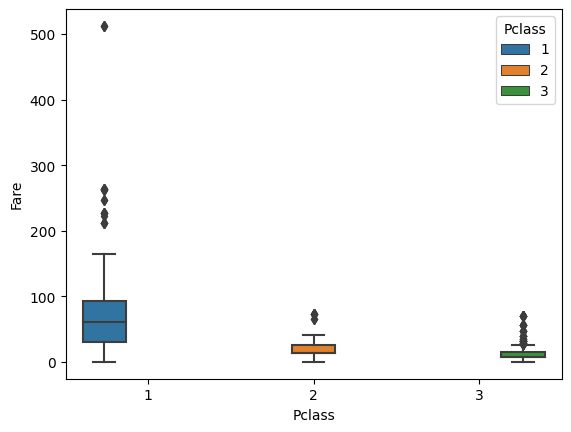

In [272]:
sns.boxplot(data=dataset, x="Pclass", y="Fare", hue="Pclass")

Исходя из построенного графика можно сделать вывод, что между стоимостю билета и классом существует умеренная положительная корреляция: чем выше стоимость, тем выше класс. Можно сказать, что корреляция существует так как нижний квартиль одного ящика находится на уровне верхнего квартиля другого ящика.
В классах 2 и 3 встречаются выбросы. Так, например, в некоторых случаях цена за билет в такой класс была сопоставима с медианной ценой в 1 класс. Этот момент влияет на силу линейной связи, поэтому корреляция умеренная, а не сильная.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [273]:
dataset.groupby('Embarked')['Fare'].mean().to_frame()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


<Axes: xlabel='Embarked', ylabel='Fare'>

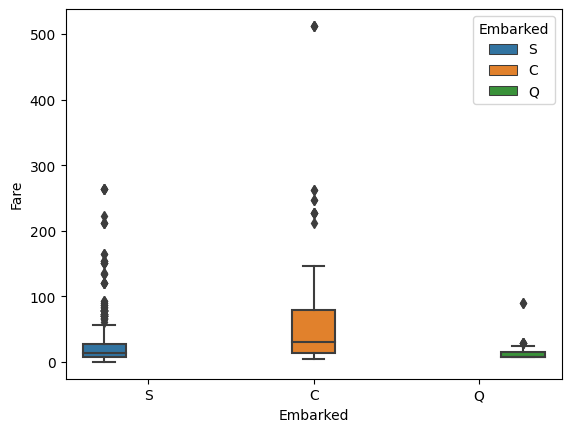

In [274]:
sns.boxplot(data=dataset, x="Embarked", y="Fare", hue="Embarked")

Замечания по графику:
1. У синего ящика много выбросов.
2. Нижний квартиль рыжего ящика находится на уровне медианы остальных.

Если у человека дешевый билет, то он мог сесть в любом из портов. При этом с увеличением цены билета, увеличивается вероятность того, что он сел в порту `C`, но зависимость не очень сильная, так как достаточно много выбросов по цене у порта `S`. Поэтому можно сделать вывод, что корреляция, если есть, то достаточно слабая.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

[Text(0.5, 1.0, 'Survived/Not survived distribution by age')]

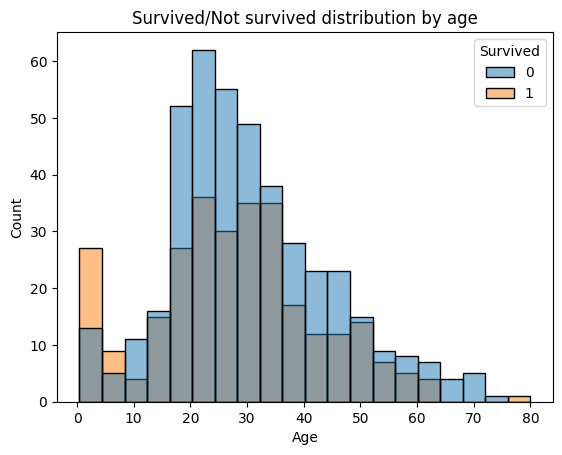

In [275]:
sns.histplot(dataset, x='Age', hue='Survived').set(title='Survived/Not survived distribution by age')

In [276]:
dataset.groupby('Pclass')['Age'].mean().to_frame()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


[Text(0.5, 1.0, 'Survived/Not survived male distribution by age')]

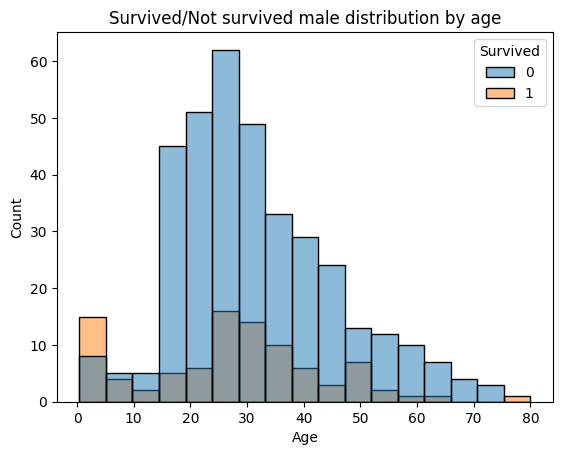

In [277]:
sns.histplot(dataset[dataset['Sex'] == 'male'], x='Age', hue='Survived').set(title='Survived/Not survived male distribution by age')

[Text(0.5, 1.0, 'Survived/Not survived female distribution by age')]

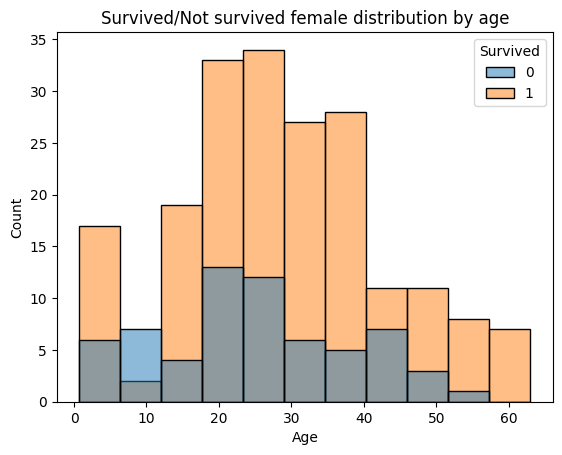

In [278]:
sns.histplot(dataset[dataset['Sex'] == 'female'], x='Age', hue='Survived').set(title='Survived/Not survived female distribution by age')

Возраст разный. Это может быть связано с тем, что состоятельные люди более возрастные

Прежде всего старались спасать женщин (в любом возрасте) и детей, такой вывод помогают сделать первый и третий графики.  
Мужчин в возрасте от 16 до 25 лет выжило очень мало, что скорее всего было связано с тем, что они помогали участвовать в эвакуации женщин/детей.  
На графике с распределением по мужчинам в районе 50 лет видно относительно большое количество выживших (в сравнении с возрастами рядом). Это может быть связано со статусом данных людей, а также с тем, что благодаря ему они ехали в первом классе (небольшое подтверждение этому в табличке со средним возрастом по классам).


